In [1]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {cuda_available}")

if cuda_available:
    # Get the number of GPUs available
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs: {num_gpus}")

    # List all available GPUs
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

    # Print the current GPU device and memory info
    current_device = torch.cuda.current_device()
    print(f"Current GPU Device: {current_device} - {torch.cuda.get_device_name(current_device)}")

    # Memory details for the current GPU
    memory = torch.cuda.memory_stats(current_device)
    total_memory = torch.cuda.get_device_properties(current_device).total_memory / 1e9  # Convert to GB
    print(f"Total Memory on GPU {current_device}: {total_memory:.2f} GB")

else:
    print("CUDA is not available. No GPUs detected.")


CUDA Available: True
Number of GPUs: 1
GPU 0: NVIDIA A100-SXM4-40GB
Current GPU Device: 0 - NVIDIA A100-SXM4-40GB
Total Memory on GPU 0: 42.41 GB


Model loaded: /home/exouser/Desktop/idp_codebase/yolo/models/detection/obj_11/yolo11-detection-obj_11.pt

image 1/1 /home/exouser/Desktop/idp_codebase/datasets/yolo11/ipd_bop_data_jan25_1_obj_11/images/000004_rgb_cam1_000083.jpg: 640x640 9 object_11s, 9.3ms
Speed: 9.4ms preprocess, 9.3ms inference, 144.9ms postprocess per image at shape (1, 3, 640, 640)
Processed and saved: /home/exouser/Desktop/idp_codebase/output/yolo_test_results/result_000004_rgb_cam1_000083.jpg

image 1/1 /home/exouser/Desktop/idp_codebase/datasets/yolo11/ipd_bop_data_jan25_1_obj_11/images/000000_rgb_cam3_000002.jpg: 640x640 10 object_11s, 9.3ms
Speed: 2.3ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Processed and saved: /home/exouser/Desktop/idp_codebase/output/yolo_test_results/result_000000_rgb_cam3_000002.jpg

image 1/1 /home/exouser/Desktop/idp_codebase/datasets/yolo11/ipd_bop_data_jan25_1_obj_11/images/000000_rgb_cam1_000036.jpg: 640x640 7 object_11s, 10.6ms
Speed: 3.3

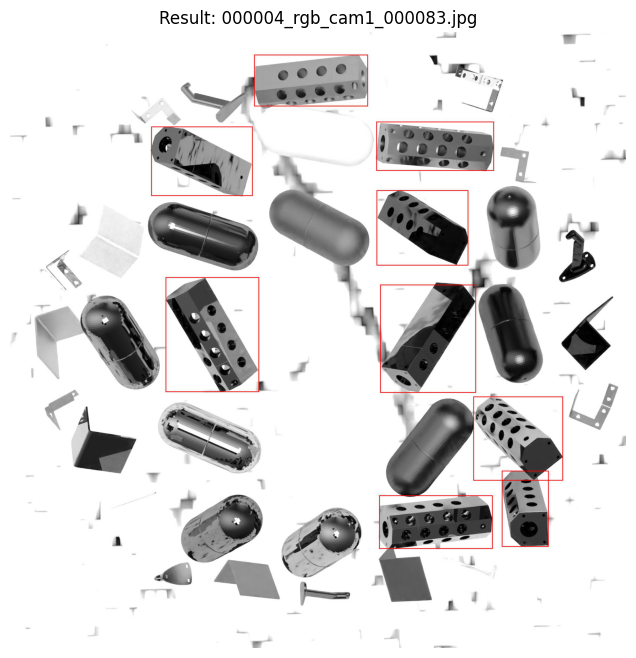

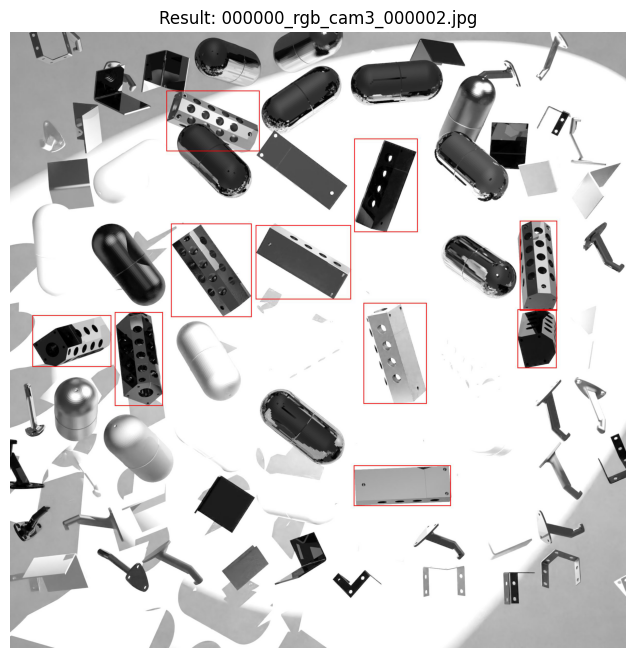

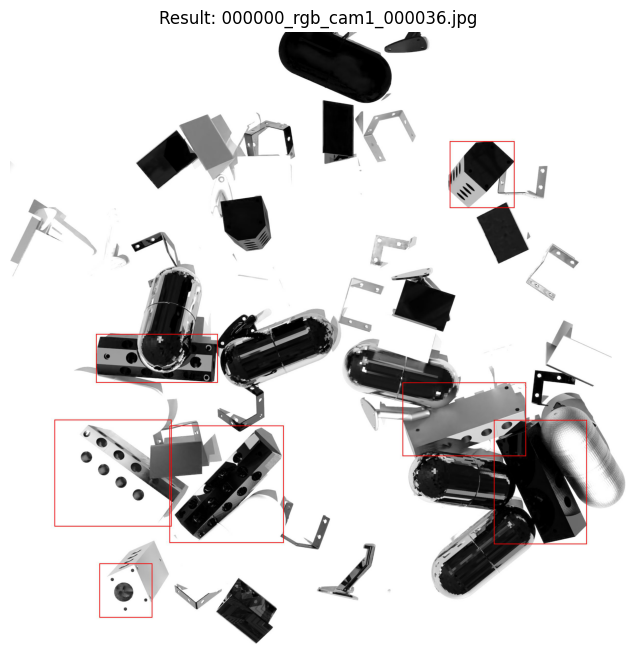

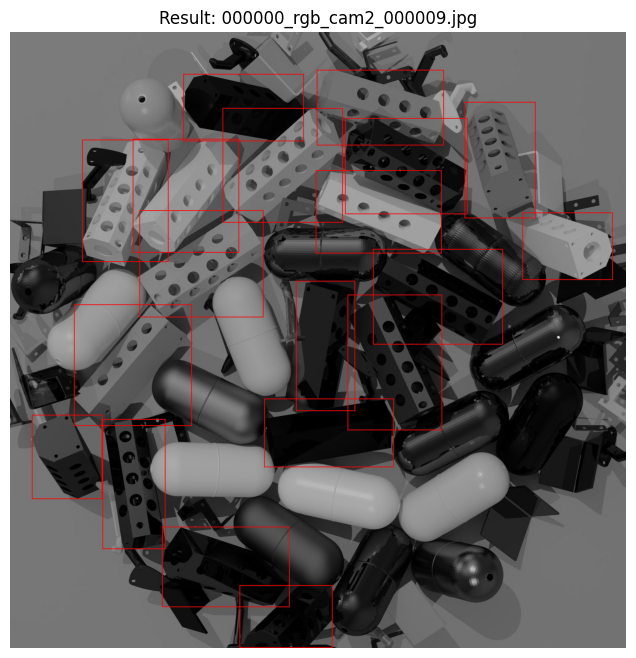

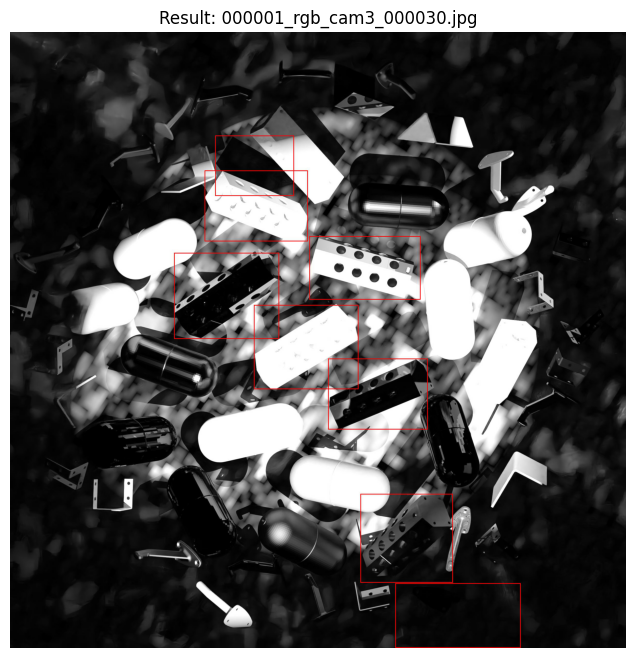

In [1]:
import os
import random
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Get current working directory
current_dir = os.getcwd()

# Define the paths relative to the current working directory
model_path = os.path.join(current_dir, "yolo", "models", "detection", "obj_11", "yolo11-detection-obj_11.pt")
dataset_path = os.path.join(current_dir, "datasets", "yolo11", "ipd_bop_data_jan25_1_obj_11", "images")
output_path = os.path.join(current_dir, "output", "yolo_test_results")

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Get a list of all available images
all_images = [f for f in os.listdir(dataset_path) if f.endswith(".jpg")]

# Randomly select 5 images for testing
test_images = random.sample(all_images, min(5, len(all_images)))

# Load the trained YOLO model
model = YOLO(model_path)
print(f"Model loaded: {model_path}")

# Function to draw bounding boxes without confidence scores
def draw_boxes_without_scores(image, results):
    draw = ImageDraw.Draw(image)
    for box in results.boxes.xyxy:  # Get bounding box coordinates
        x1, y1, x2, y2 = map(int, box[:4])  # Extract coordinates
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)  # Draw the rectangle
    return image

# Process and save results for selected images
for img_file in test_images:
    img_path = os.path.join(dataset_path, img_file)

    # Run inference on the image
    results = model(img_path)

    # Load the original image
    img = Image.open(img_path)

    # Draw bounding boxes without confidence scores
    img_with_boxes = draw_boxes_without_scores(img, results[0])

    # Save the result
    result_img_path = os.path.join(output_path, f"result_{img_file}")
    img_with_boxes.save(result_img_path)
    print(f"Processed and saved: {result_img_path}")

# Visualize the results
print("Displaying test results:")
for img_file in test_images:
    result_img_path = os.path.join(output_path, f"result_{img_file}")
    if not os.path.exists(result_img_path):
        print(f"Result image not found: {result_img_path}")
        continue

    # Load and display the image
    img = Image.open(result_img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Result: {img_file}")
    plt.show()


✅ Found 9 images to process.
✅ Model loaded: /home/exouser/Desktop/idp_codebase/yolo/models/detection/obj_11/yolo11-detection-obj_11.pt

image 1/1 /home/exouser/Desktop/idp_codebase/datasets/ipd/test/000004/rgb_cam1/000000.png: 384x640 1 object_11, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
✅ Processed and saved: /home/exouser/Desktop/idp_codebase/output/yolo_test_results/result_000000.png

image 1/1 /home/exouser/Desktop/idp_codebase/datasets/ipd/test/000004/rgb_cam1/000001.png: 384x640 1 object_11, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
✅ Processed and saved: /home/exouser/Desktop/idp_codebase/output/yolo_test_results/result_000001.png

image 1/1 /home/exouser/Desktop/idp_codebase/datasets/ipd/test/000004/rgb_cam1/000002.png: 384x640 1 object_11, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
✅ Processed and

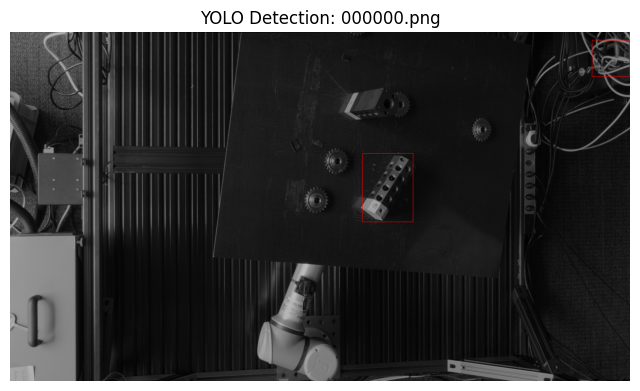

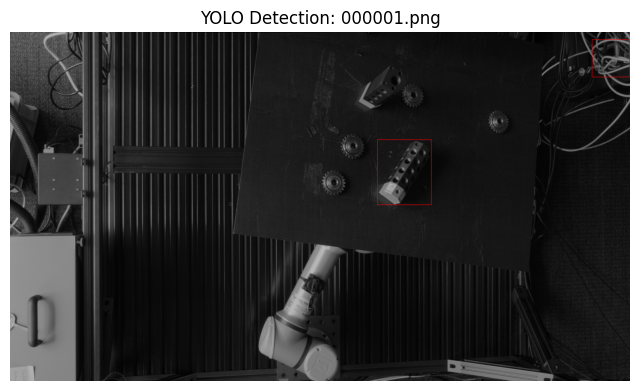

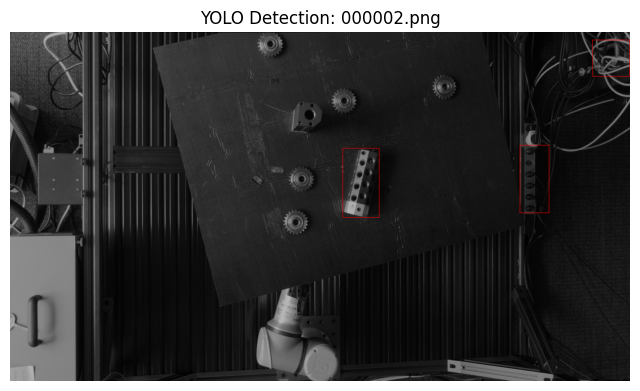

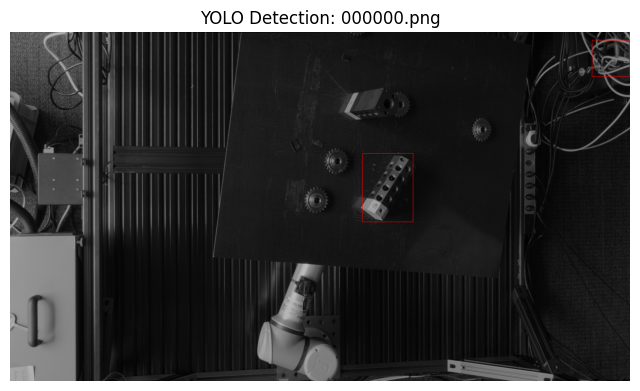

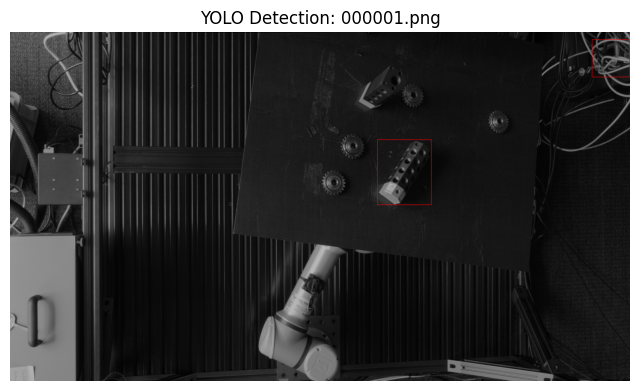

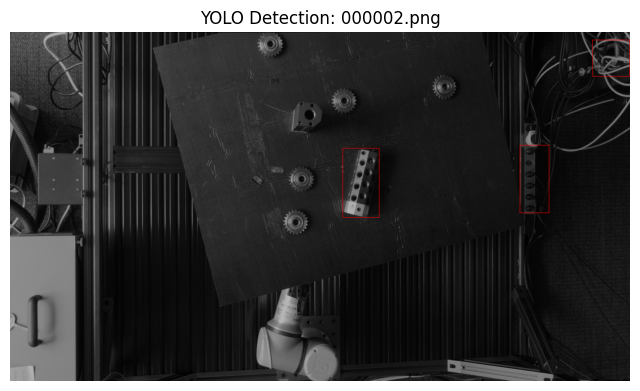

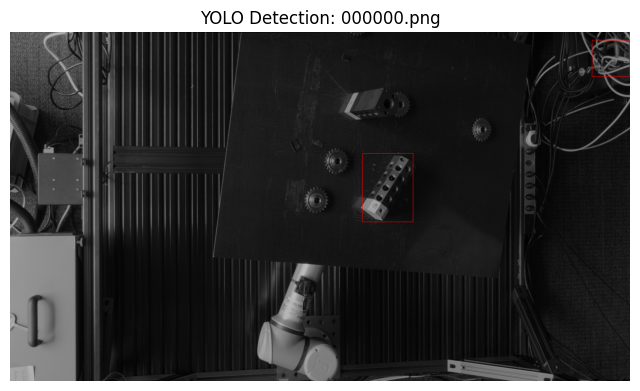

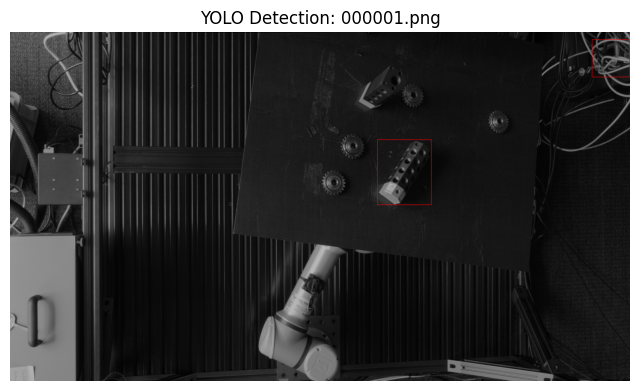

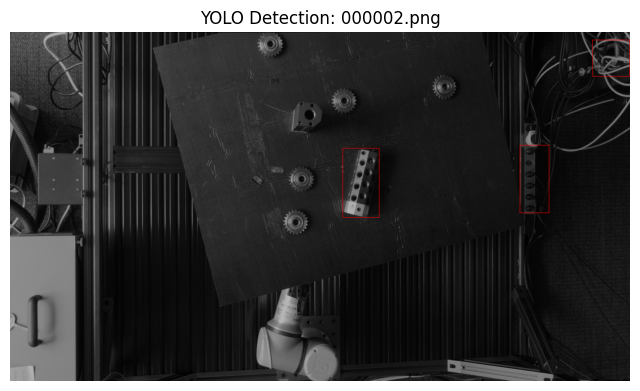

In [4]:
import os
import random
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Get current working directory
current_dir = os.getcwd()

# Define paths relative to the current directory
model_path = os.path.join(current_dir, "yolo", "models", "detection", "obj_11", "yolo11-detection-obj_11.pt")
scene_folder = os.path.join(current_dir, "datasets", "ipd", "test", "000004")  # Only checking Scene 000004
output_path = os.path.join(current_dir, "output", "yolo_test_results")

# Ensure the output directory exists
os.makedirs(output_path, exist_ok=True)

# Cameras to process
cameras = ["rgb_cam1", "rgb_cam2", "rgb_cam3"]

# Collect images from all three cameras
image_paths = []
for cam in cameras:
    cam_path = os.path.join(scene_folder, cam)
    if not os.path.exists(cam_path):
        print(f"⚠️ Camera folder not found: {cam_path}")
        continue

    # Find all .jpg and .png images
    images = sorted([os.path.join(cam_path, f) for f in os.listdir(cam_path) if f.lower().endswith(('.jpg', '.png'))])

    # Select up to 3 images from this camera
    image_paths.extend(images[:3])  # Take first 3 images

# Debug: Ensure we have 9 images
print(f"✅ Found {len(image_paths)} images to process.")

# Load the trained YOLO model
model = YOLO(model_path)
print(f"✅ Model loaded: {model_path}")

# Function to draw bounding boxes
def draw_boxes(image, results):
    draw = ImageDraw.Draw(image)
    if results.boxes.xyxy is not None:
        for box in results.boxes.xyxy:  # Get bounding box coordinates
            x1, y1, x2, y2 = map(int, box[:4])  # Extract coordinates
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)  # Draw the rectangle
    return image

# Process and save results
for img_path in image_paths:
    img_name = os.path.basename(img_path)

    # Run YOLO inference
    results = model(img_path)

    # Debug: Check if YOLO found any objects
    if results[0].boxes.xyxy is None or len(results[0].boxes.xyxy) == 0:
        print(f"⚠️ No detections in {img_name}")

    # Load the original image
    img = Image.open(img_path)

    # Draw bounding boxes
    img_with_boxes = draw_boxes(img, results[0])

    # Save the result
    result_img_path = os.path.join(output_path, f"result_{img_name}")
    img_with_boxes.save(result_img_path)
    print(f"✅ Processed and saved: {result_img_path}")

# Display the results
print("\n📸 Displaying YOLO results:")
for img_path in image_paths:
    result_img_path = os.path.join(output_path, f"result_{os.path.basename(img_path)}")
    
    if not os.path.exists(result_img_path):
        print(f"⚠️ Result image not found: {result_img_path}")
        continue

    # Load and show the image
    img = Image.open(result_img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"YOLO Detection: {os.path.basename(img_path)}")
    plt.show()


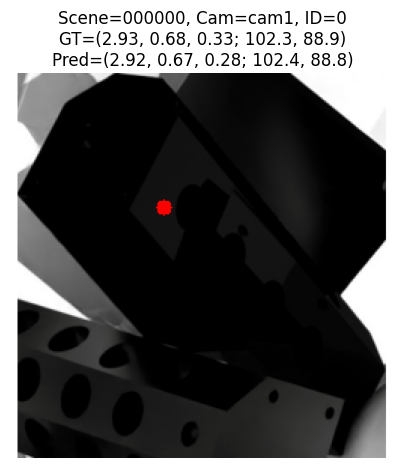

Ground Truth Label: Rotation (Radians): [2.9278481006622314, 0.6816851496696472, 0.33177536725997925], Center: (102.3, 88.9)
Predicted Label:    Rotation (Radians): [2.9169788360595703, 0.6685019135475159, 0.27708667516708374], Center: (102.4, 88.8)


In [3]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import normalize
from models.simple_pose_net import SimplePoseNet
from data.bop_dataset import BOPSingleObjDataset, bop_collate_fn
def visualize_first_sample_with_labels(model, dataset, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    # Ensure the model is in evaluation mode
    model.eval()

    # Retrieve the first sample
    img_t, lbl_t, meta = dataset[0]

    with torch.no_grad():
        # Get prediction
        img_t = img_t.unsqueeze(0).to(device)  # Add batch dimension
        pred = model(img_t).squeeze(0).cpu().numpy()

    # Prepare the image for visualization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    img_dn = img_t.squeeze(0).cpu() * std + mean
    img_np = img_dn.clamp(0, 1).numpy().transpose(1, 2, 0) * 255  # Convert to numpy and scale to 0-255
    img_np = img_np.astype(np.uint8)

    # Extract GT and predicted labels
    cx_gt, cy_gt = lbl_t[3:].tolist()
    cx_pred, cy_pred = pred[3:5].tolist()

    # Draw the GT and predicted centers on the image
    img_visual = img_np.copy()
    cv2.circle(img_visual, (int(round(cx_gt)), int(round(cy_gt))), 5, (0, 255, 0), -1)  # Green for GT
    cv2.circle(img_visual, (int(round(cx_pred)), int(round(cy_pred))), 5, (0, 0, 255), -1)  # Red for Prediction

    # Extract rotation angles
    r_gt = lbl_t[:3].tolist()
    r_pred = pred[:3].tolist()

    # Show the image and print the labels
    plt.figure(figsize=(5, 5))
    plt.imshow(img_visual[:, :, ::-1])  # Convert BGR to RGB for display
    plt.title(
        f"Scene={meta['scene_id']}, Cam={meta['cam_id']}, ID={meta['im_id']}\n"
        f"GT=({r_gt[0]:.2f}, {r_gt[1]:.2f}, {r_gt[2]:.2f}; {cx_gt:.1f}, {cy_gt:.1f})\n"
        f"Pred=({r_pred[0]:.2f}, {r_pred[1]:.2f}, {r_pred[2]:.2f}; {cx_pred:.1f}, {cy_pred:.1f})"
    )
    plt.axis("off")
    plt.show()

    # Print GT and Predicted labels
    print(f"Ground Truth Label: Rotation (Radians): {r_gt}, Center: ({cx_gt:.1f}, {cy_gt:.1f})")
    print(f"Predicted Label:    Rotation (Radians): {r_pred}, Center: ({cx_pred:.1f}, {cy_pred:.1f})")


# Usage example
if __name__ == "__main__":
    # Assume you have a trained model and dataset
    root_dir = "/home/exouser/Desktop/Github_pipe/datasets/ipd_bop_data"
    ds_fixed = BOPSingleObjDataset(
        root_dir=root_dir,
        scene_ids=["000000"],
        cam_ids=["cam1", "cam2", "cam3"],
        target_obj_id=11,
        target_size=256,
        augment=False
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = SimplePoseNet(pretrained=False).to(device)
    model_path = "/home/exouser/Desktop/Github_pipe/checkpoints/scene_000000/obj_11/best_model_obj11.pth"
    model.load_state_dict(torch.load(model_path))

    visualize_first_sample_with_labels(model, ds_fixed, device)



0: 640x640 12 object_11s, 7.6ms
Speed: 2.1ms preprocess, 7.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 object_11s, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 object_11s, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

--- YOLO Detection ---
Camera cam1 detected 12 objects:
  - Index 0: BBox=(1329, 1622, 1713, 1980) Center=(1521.0,1801.0)
  - Index 1: BBox=(736, 32, 1007, 247) Center=(871.5,139.5)
  - Index 2: BBox=(1478, 293, 1849, 629) Center=(1663.5,461.0)
  - Index 3: BBox=(974, 801, 1389, 990) Center=(1181.5,895.5)
  - Index 4: BBox=(1980, 766, 2385, 1095) Center=(2182.5,930.5)
  - Index 5: BBox=(920, 1325, 1322, 1597) Center=(1121.0,1461.0)
  - Index 6: BBox=(1879, 1131, 2181, 1513) Center=(2030.0,1322.0)
  - Index 7: BBox=(1262, 645, 1643, 824) Center=(1452.5,734.5)
  - Index 8: BBox=(467, 707, 793, 1118) Center=

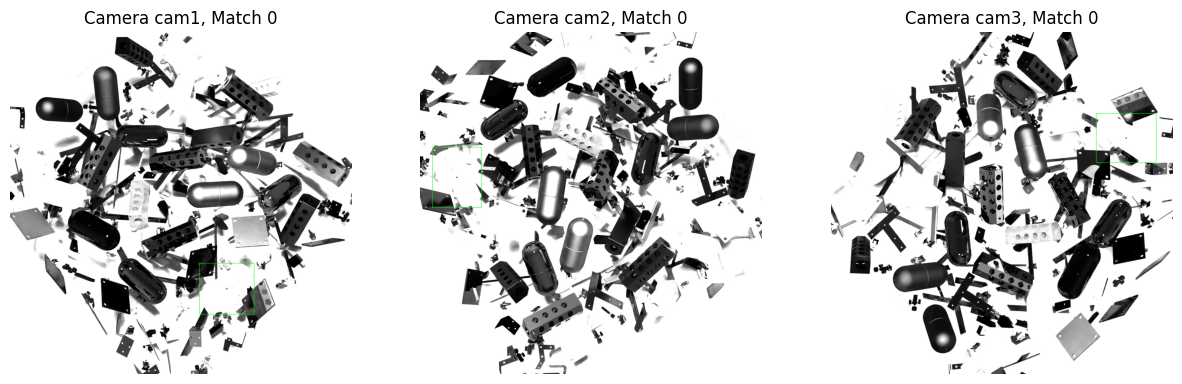

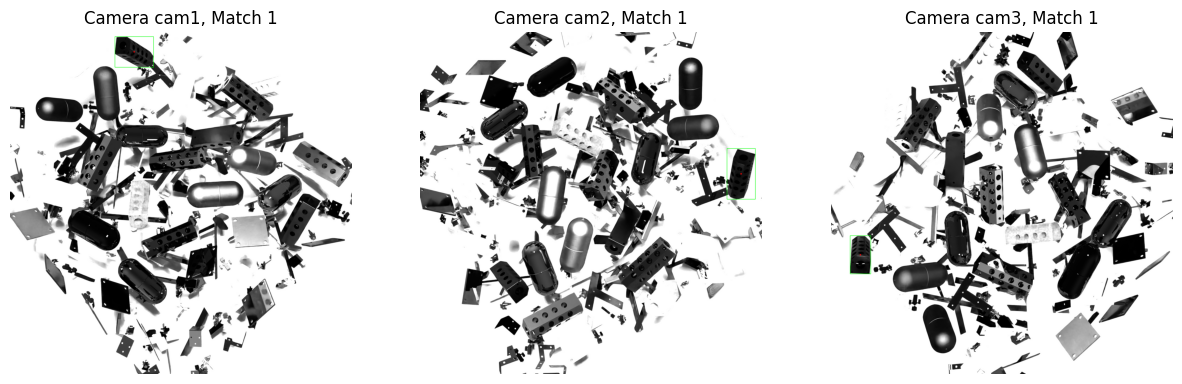

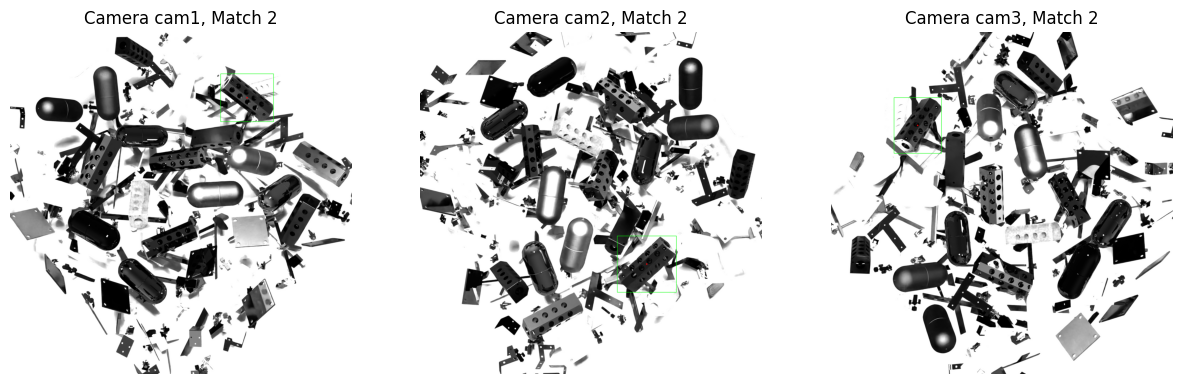

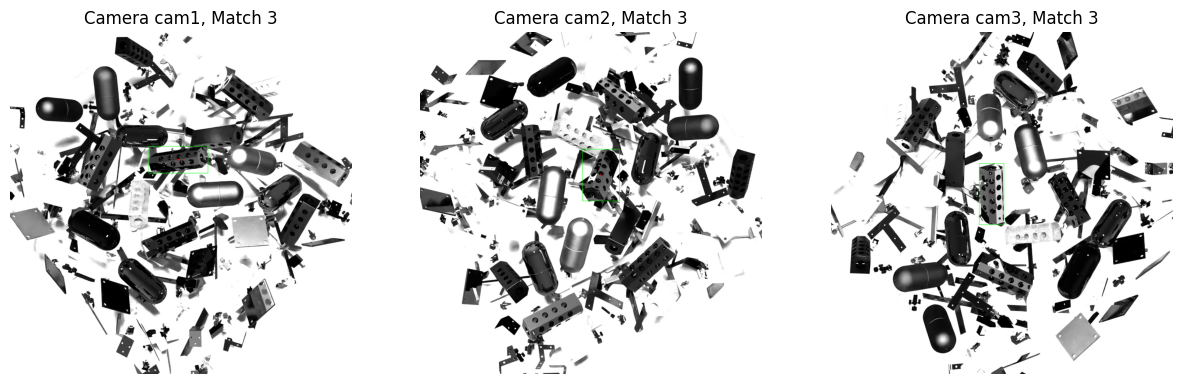

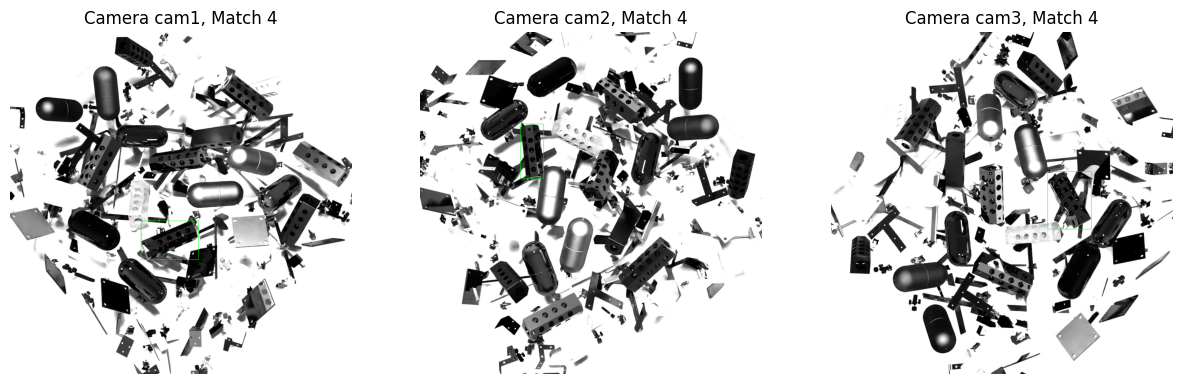

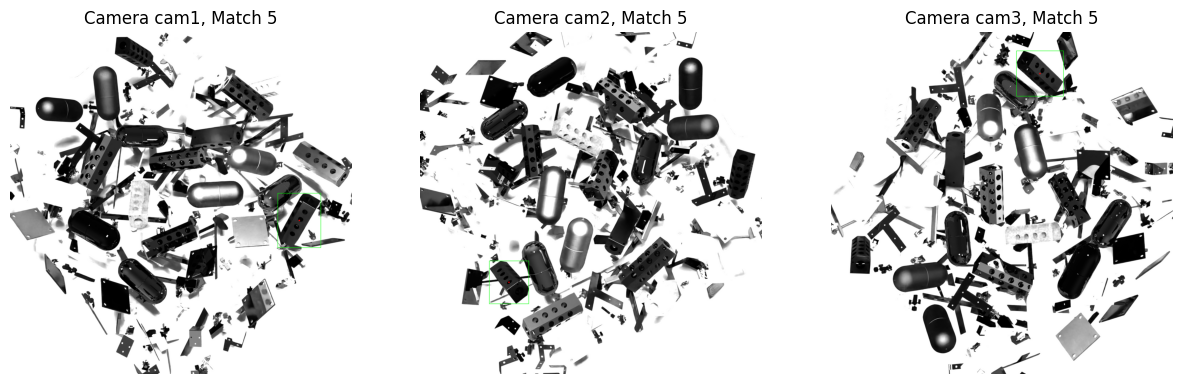

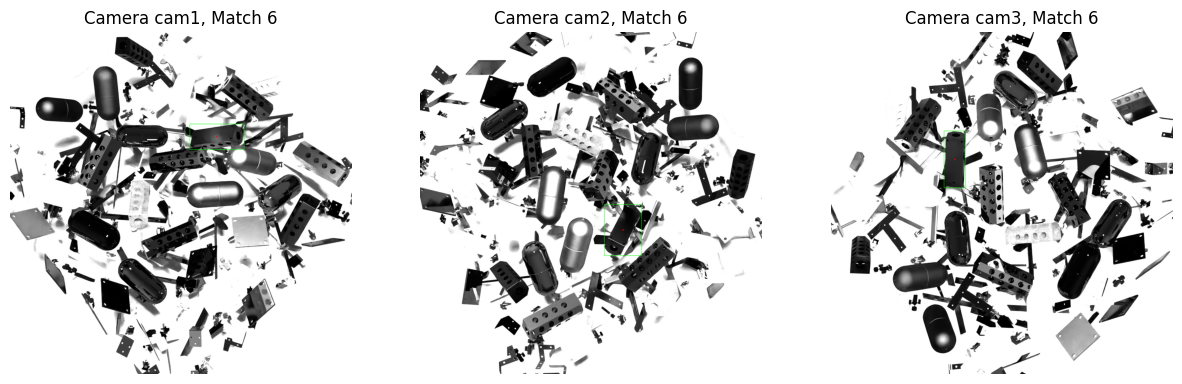

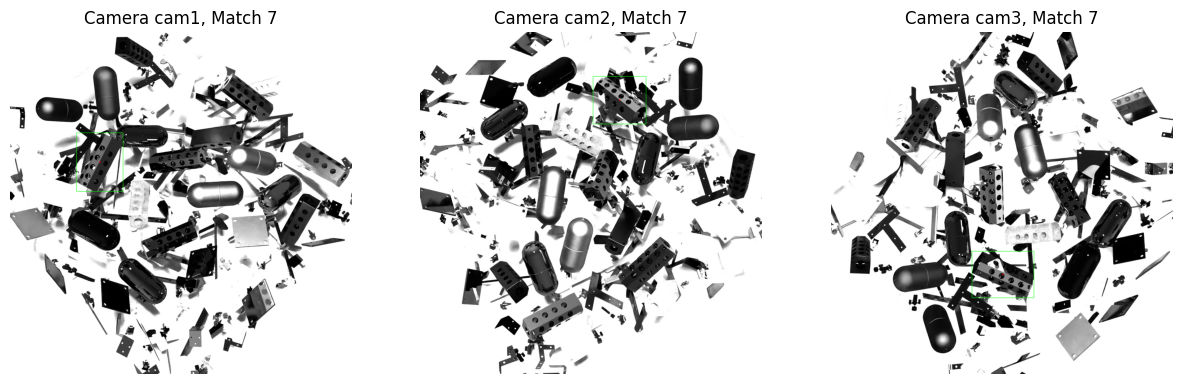

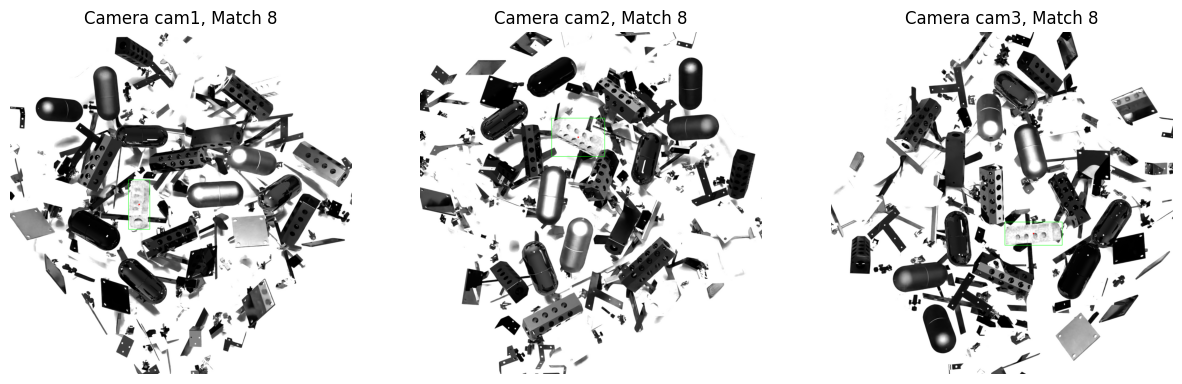

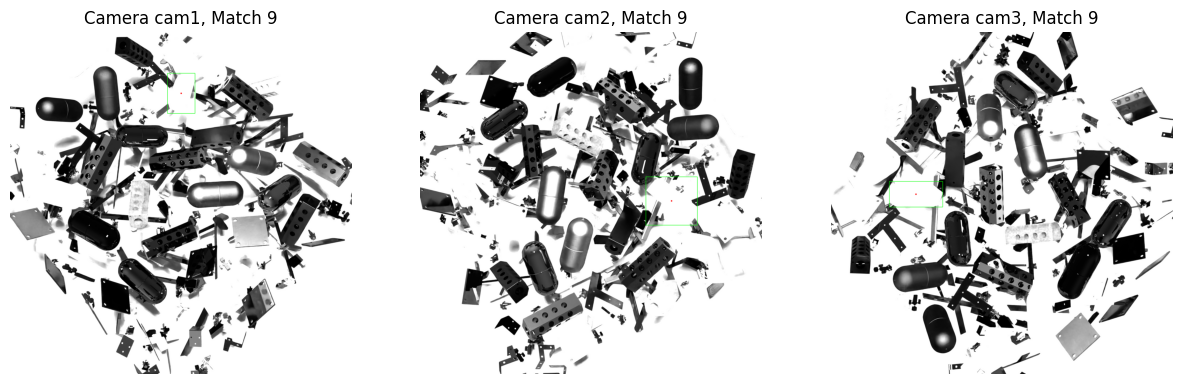

In [18]:
from ultralytics import YOLO
import os
import json
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.optimize import linear_sum_assignment
def load_camera_params(scene_dir, cam_ids):
    """Load intrinsics/extrinsics from JSON."""
    params = {}
    for cid in cam_ids:
        with open(os.path.join(scene_dir, f"scene_camera_{cid}.json")) as f:
            data = json.load(f)
        params[cid] = {'K': {}, 'R': {}, 't': {}}
        for im_id_str, vals in data.items():
            im_id = int(im_id_str)
            params[cid]['K'][im_id] = np.array(vals['cam_K'], dtype=np.float32).reshape(3, 3)
            params[cid]['R'][im_id] = np.array(vals['cam_R_w2c'], dtype=np.float32).reshape(3, 3)
            params[cid]['t'][im_id] = np.array(vals['cam_t_w2c'], dtype=np.float32).flatten()
    return params

def compute_fundamental_matrix(K1, R1, t1, K2, R2, t2):
    """
    Compute fundamental matrix F between cameras 1 and 2.
    Following the formula:
        R_rel = R2 * R1^T
        t_rel = t2 - R_rel * t1
        E = [t_rel]_x * R_rel
        F = K2^-T * E * K1^-1
    """
    t1 = t1.flatten()
    t2 = t2.flatten()
    R_rel = R2 @ R1.T
    t_rel = t2 - R_rel @ t1

    # Skew-symmetric
    tx = np.array([
        [0,         -t_rel[2],  t_rel[1]],
        [t_rel[2],   0,        -t_rel[0]],
        [-t_rel[1],  t_rel[0],  0       ]
    ], dtype=np.float32)

    E = tx @ R_rel  # essential
    K1_inv = np.linalg.inv(K1)
    K2_inv = np.linalg.inv(K2)
    F = (K2_inv.T) @ E @ K1_inv

    # Optional normalize if F[2,2] is large enough
    if abs(F[2, 2]) > 1e-8:
        F /= F[2, 2]

    return F

def compute_cost_matrix(dets1, dets2, dets3, F12, F13, F23):
    """Compute the NxMxP cost matrix for bounding box matches."""
    N, M, P = len(dets1), len(dets2), len(dets3)
    cost = np.zeros((N, M, P), dtype=np.float32)

    for i in range(N):
        pt1 = dets1[i]['bb_center']
        for j in range(M):
            pt2 = dets2[j]['bb_center']
            for k in range(P):
                pt3 = dets3[k]['bb_center']
                cost[i, j, k] = epipolar_error_full(pt1, pt2, pt3, F12, F13, F23)
    return cost
def epipolar_error_full(pt1, pt2, pt3, F12, F13, F23):
    """
    epipolar error across three cams:
      e12 + e13 + e23
    """
    e12 = epipolar_error(pt1, pt2, F12)
    e13 = epipolar_error(pt1, pt3, F13)
    e23 = epipolar_error(pt2, pt3, F23)
    return e12 + e13 + e23

def epipolar_error(pt1, pt2, F):
    """
    Symmetric epipolar distance for points pt1 (cam1), pt2 (cam2).
    """
    pt1_h = np.array([pt1[0], pt1[1], 1.0])
    pt2_h = np.array([pt2[0], pt2[1], 1.0])

    l2 = F @ pt1_h     # line in cam2
    l1 = F.T @ pt2_h   # line in cam1

    # Normalize
    if np.linalg.norm(l1[:2])>1e-8:
        l1 /= np.linalg.norm(l1[:2])
    if np.linalg.norm(l2[:2])>1e-8:
        l2 /= np.linalg.norm(l2[:2])

    d1 = abs(np.dot(l1, pt1_h)) if np.linalg.norm(l1[:2])>1e-8 else 9999
    d2 = abs(np.dot(l2, pt2_h)) if np.linalg.norm(l2[:2])>1e-8 else 9999
    return 0.5*(d1 + d2)

def match_objects(cost_matrix, threshold):
    """
    Flatten => Hungarian => keep matches < threshold => list of (i, j, k).
    """
    N, M, P = cost_matrix.shape
    matched = []
    flattened = cost_matrix.reshape(N*M, P)
    row_idx, col_idx = linear_sum_assignment(flattened)

    for r, c in zip(row_idx, col_idx):
        val = flattened[r, c]
        if val < threshold:
            i = r // M
            j = r % M
            k = c
            matched.append((i, j, k))
    return matched

def compute_fundamental_matrix(K1, R1, t1, K2, R2, t2):
    """
    Compute fundamental matrix F between cameras 1 and 2.
    Following the formula:
        R_rel = R2 * R1^T
        t_rel = t2 - R_rel * t1
        E = [t_rel]_x * R_rel
        F = K2^-T * E * K1^-1
    """
    t1 = t1.flatten()
    t2 = t2.flatten()
    R_rel = R2 @ R1.T
    t_rel = t2 - R_rel @ t1

    # Skew-symmetric
    tx = np.array([
        [0,         -t_rel[2],  t_rel[1]],
        [t_rel[2],   0,        -t_rel[0]],
        [-t_rel[1],  t_rel[0],  0       ]
    ], dtype=np.float32)

    E = tx @ R_rel  # essential
    K1_inv = np.linalg.inv(K1)
    K2_inv = np.linalg.inv(K2)
    F = (K2_inv.T) @ E @ K1_inv

    # Optional normalize if F[2,2] is large enough
    if abs(F[2, 2]) > 1e-8:
        F /= F[2, 2]

    return F
    
if __name__ == "__main__":

    # Configuration
    scene_dir = "/home/exouser/Desktop/CVPR2025Workshop/datasets/ipd_bop_data/train_pbr/000000"
    cam_ids = ["cam1", "cam2", "cam3"]
    image_id = 2
    yolo_model_path = "/home/exouser/Desktop/CVPR2025Workshop/models/detection/obj_11/yolo11-detection-obj_11.pt"
    threshold = 50

    # Load camera parameters
    cam_params = load_camera_params(scene_dir, cam_ids)

    # Compute fundamental matrices
    K1, R1, t1 = cam_params["cam1"]["K"][image_id], cam_params["cam1"]["R"][image_id], cam_params["cam1"]["t"][image_id]
    K2, R2, t2 = cam_params["cam2"]["K"][image_id], cam_params["cam2"]["R"][image_id], cam_params["cam2"]["t"][image_id]
    K3, R3, t3 = cam_params["cam3"]["K"][image_id], cam_params["cam3"]["R"][image_id], cam_params["cam3"]["t"][image_id]
    F12 = compute_fundamental_matrix(K1, R1, t1, K2, R2, t2)
    F13 = compute_fundamental_matrix(K1, R1, t1, K3, R3, t3)
    F23 = compute_fundamental_matrix(K2, R2, t2, K3, R3, t3)

    # YOLO bounding box detection
    yolo = YOLO(yolo_model_path)
    camera_predictions = {}

    for cam_id in cam_ids:
        img_path = os.path.join(scene_dir, f"rgb_{cam_id}", f"{image_id:06d}.jpg")
        if not os.path.exists(img_path):
            camera_predictions[cam_id] = []
            continue

        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        detections = yolo(img_rgb)[0]
        if len(detections.boxes) == 0:
            camera_predictions[cam_id] = []
            continue

        boxes = detections.boxes.xyxy.cpu().numpy()
        confs = detections.boxes.conf.cpu().numpy()
        clss = detections.boxes.cls.cpu().numpy()

        # Keep only class=0 with conf>=0.5
        valid = (clss == 0) & (confs >= 0.5)
        boxes = boxes[valid]

        preds_cam = []
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            cx = 0.5 * (x1 + x2)
            cy = 0.5 * (y1 + y2)
            preds_cam.append({"bbox": (x1, y1, x2, y2), "bb_center": (cx, cy)})

        camera_predictions[cam_id] = preds_cam

    # Print YOLO detection results
    print("\n--- YOLO Detection ---")
    for cam_id in cam_ids:
        preds = camera_predictions[cam_id]
        print(f"Camera {cam_id} detected {len(preds)} objects:")
        for i, det in enumerate(preds):
            print(f"  - Index {i}: BBox={det['bbox']} Center=({det['bb_center'][0]:.1f},{det['bb_center'][1]:.1f})")

    # Epipolar matching
    det_cam1, det_cam2, det_cam3 = camera_predictions["cam1"], camera_predictions["cam2"], camera_predictions["cam3"]

    if len(det_cam1) == 0 or len(det_cam2) == 0 or len(det_cam3) == 0:
        print("\nAt least one camera has zero detections => no matching.")
    else:
        cost_matrix = compute_cost_matrix(det_cam1, det_cam2, det_cam3, F12, F13, F23)
        matches = match_objects(cost_matrix, threshold)
        cx_cy_array = []

        print(f"\n--- Matched Groups (i, j, k) with cost < {threshold} ---")
        for i, j, k in matches:
            cx1, cy1 = det_cam1[i]["bb_center"]
            cx2, cy2 = det_cam2[j]["bb_center"]
            cx3, cy3 = det_cam3[k]["bb_center"]
            print(f"  cam1: {i}, cam2: {j}, cam3: {k}, Centers: ({cx1:.1f},{cy1:.1f}), ({cx2:.1f},{cy2:.1f}), ({cx3:.1f},{cy3:.1f})")
            cx_cy_array.append([[cx1, cy1], [cx2, cy2], [cx3, cy3]])

        cx_cy_array = np.array(cx_cy_array, dtype=np.float32)

        print("\n--- Final cx_cy_array (N, 3, 2) ---")
        print(cx_cy_array.shape)
        print(cx_cy_array)

        # Visualize matched bounding boxes for each group
        for idx, match in enumerate(cx_cy_array):
            plt.figure(figsize=(15, 5))
            for cam_idx, cam_id in enumerate(cam_ids):
                img_path = os.path.join(scene_dir, f"rgb_{cam_id}", f"{image_id:06d}.jpg")
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                bbox = det_cam1 if cam_idx == 0 else (det_cam2 if cam_idx == 1 else det_cam3)
                matched_bbox = bbox[matches[idx][cam_idx]]
                x1, y1, x2, y2 = map(int, matched_bbox["bbox"])
                cx, cy = match[cam_idx]

                # Draw bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw center point
                cv2.circle(img, (int(cx), int(cy)), 5, (255, 0, 0), -1)

                plt.subplot(1, 3, cam_idx + 1)
                plt.imshow(img)
                plt.title(f"Camera {cam_id}, Match {idx}")
                plt.axis("off")
            plt.show()
